# Zonda Data Pre-Processing

Zonda data files are very with most columns unused, so this notebook removes unneeded rows and columns and writes the results to the input folder for other notebooks to process.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", None)

file_path = '/Users/Shared/Downloads' # If changing this location and using vscode dev containers, also change devcontainer.json mount point

In [3]:
df = pd.read_csv(f'{file_path}/zonda_project_plan.csv', encoding='iso-8859-1')
df.to_csv(f'{file_path}/zonda_project_plan_with_id.csv', index_label='ID', index=True)

In [4]:
input_df = pd.read_csv(f'{file_path}/zonda_project_plan_with_id.csv', encoding='iso-8859-1')
print('Percentage of data missing:')
(input_df.isnull().sum()/len(input_df)*100).round(1)

Percentage of data missing:


ID                               0.0
Project_Name                     0.0
Builder_name                     0.0
Parent_Builder                   0.0
Status                           0.0
state                            0.0
cbsa_title                       0.1
County                           0.0
City                             0.0
Zip_Code                         0.1
Master_Plan                     78.4
Product_Type                     0.0
Unit_Size_Min                    5.5
Unit_Size_Max                    2.0
Sales_Office_Phone               2.5
Website                         78.2
TypicalLotSize                  21.5
lot_dimension                   34.5
Lot_Width_Variations            33.6
Sales_Rate                       4.5
Sales_Rate_Last_Three_Months     6.7
Sales_Rate_Last_Six_Months       9.4
Sales_Rate_Last_12_Months       18.0
Sold_Out_Date                   23.3
Sales_Change_Date                2.3
Open_Date                        3.4
Total_Units_Planned              1.9
T

In [5]:
# Prep input data for use for later reporting
print(f'Shape of original data = {df.shape}')
df = input_df.rename(columns={
    'City': 'City',
    'Builder_name': 'Brand',
    'garage': 'Garage',
    'Lat': 'Latitude',
    'Long': 'Longitude',
    'num_of_beds': 'Bedrooms',
    'num_of_baths': 'Baths',
    'num_of_floors': 'Stories',
    'Plan_Name': 'Plan Name',
    'price': 'Base Price',
    'Sales_Rate': 'Sales Rate',
    'square_footage': 'Base Sq Ft',
    'state': 'State',
    'TypicalLotSize': 'Lot Size',
    'Zip_Code': 'Zip',
    'Project_Name': 'Subdivision' # may use later
})
df = df.drop(['Subdivision', 'Project_Key', 'Parent_Builder', 'Status', 'cbsa_title', 'County', 'Master_Plan', 'Product_Type', 'Unit_Size_Min', 'Unit_Size_Max',
                           'Sales_Office_Phone', 'Website', 'lot_dimension', 'Lot_Width_Variations', 'Sales_Rate_Last_Three_Months', 'Sales_Rate_Last_Six_Months',
                           'Sales_Rate_Last_12_Months', 'Sold_Out_Date', 'Sales_Change_Date', 'Open_Date', 'Total_Units_Planned', 'Total_Units_Sold',
                           'Total_Remaining', 'Price_Change_Date', 'MinPrice', 'MaxPrice', 'hoa_sqft', 'hoa_1', 'hoa_2', 'Assessments', 'Assessments_Description',
                           'characteristics', 'County_Code', 'cbsa_code', 'MasterPlan_Key', 'Builder_name1', 'Project_Name1', 'last_updated_date'], axis=1)
df = df.reindex(columns=['ID', 'Brand', 'Plan Name', 'City', 'State', 'Zip', 'Latitude', 'Longitude', 'Base Sq Ft', 'Bedrooms', 'Baths', 'Garage', 'Stories', 'Lot Size', 'Sales Rate', 'Base Price'])
df['Zip'] = df['Zip'].astype('str').str.rstrip('.0')
df = df.dropna()
df = df.groupby(['Brand', 'Plan Name', 'City', 'State', 'Zip'], as_index=False).agg({
    'ID': 'first',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Base Sq Ft': 'mean',
    'Bedrooms': 'mean',
    'Baths': 'mean',
    'Garage': 'mean',
    'Stories': 'mean',
    'Lot Size': 'mean',
    'Sales Rate': 'mean',
    'Base Price': 'mean'
})
# Remove homes where data is outside the realms of realistic for putposes of this model
print(f'Shape after dropping rows or columns with missing data = {df.shape}')
df = df[
    (df['Zip'] != 'nan')
    & (df['Base Price'] >= 50000)
    & (df['Base Price'] <= 3000000)
    & (df['Base Sq Ft'] >= 1000)
    & (df['Base Sq Ft'] <= 10000)
    & (df['Bedrooms'] > 0)
    & (df['Bedrooms'] <= 10)
    & (df['Baths'] > 0)
    & (df['Baths'] <= 10)
    & (df['Garage'] >= 0)
    & (df['Garage'] <= 6)
    & (df['Stories'] > 0)
    & (df['Stories'] <= 3)
    & (df['Lot Size'] > 1000)
    & (df['Lot Size'] <= 100000)
    & (df['Sales Rate'] > 0)
    & (df['Sales Rate'] <= 50)]
# Zonda data is manually entered and prone to human entry error, so we may need to remove some rows that are way outside the norm
df = df[~df['ID'].isin([404582, 330948, 330886, 34828, 34829, 161423, 58042, 56368, 56369, 56367, 375455, 62058, 42804, 375989, 237548, 153298, 58043, 79965, 139296, 58040])] # price way too low for the combined data
df = df[~df['ID'].isin([13599, 177191, 35980, 47165, 1317, 215520, 250748, 307978, 142227, 310893, 312402, 368747, 318132, 318133, 349206, 380374, 219227, 219227, 318134, 318134])] # price way too high for the combined data
print(f'Shape after final data cleanup = {df.shape}')
df = df.reset_index(drop=True)
df.to_csv('../inputs/home_sales_zonda.csv', index=False)
df.head()

Shape of original data = (411208, 53)
Shape after dropping rows or columns with missing data = (253758, 16)
Shape after final data cleanup = (243069, 16)


,Brand,Plan Name,City,State,Zip,ID,Latitude,Longitude,Base Sq Ft,Bedrooms,Baths,Garage,Stories,Lot Size,Sales Rate,Base Price
0,1034 NE 72nd Street LLC,Plan 1225,Seattle,WA,98115,300069,47.681056,-122.315907,1225.0,2.0,2.0,0.0,3.0,1016.0,1.7,749900.0
1,1034 NE 72nd Street LLC,Plan 1643,Seattle,WA,98115,300067,47.681056,-122.315907,1643.0,3.0,2.5,0.0,3.0,1016.0,1.7,989900.0
2,1034 NE 72nd Street LLC,Plan 1737,Seattle,WA,98115,300068,47.681056,-122.315907,1737.0,3.0,2.5,0.0,3.0,1016.0,1.7,979900.0
3,13th Floor Homes,Amelia,Tamarac,FL,33319,131033,26.192302,-80.211595,1580.0,3.0,2.5,1.0,2.0,3000.0,4.3,332000.0
4,13th Floor Homes,Amelia,West Palm Beach,FL,33404,19032,26.781443,-80.082896,1558.0,3.0,2.5,1.0,2.0,2900.0,3.7,312990.0


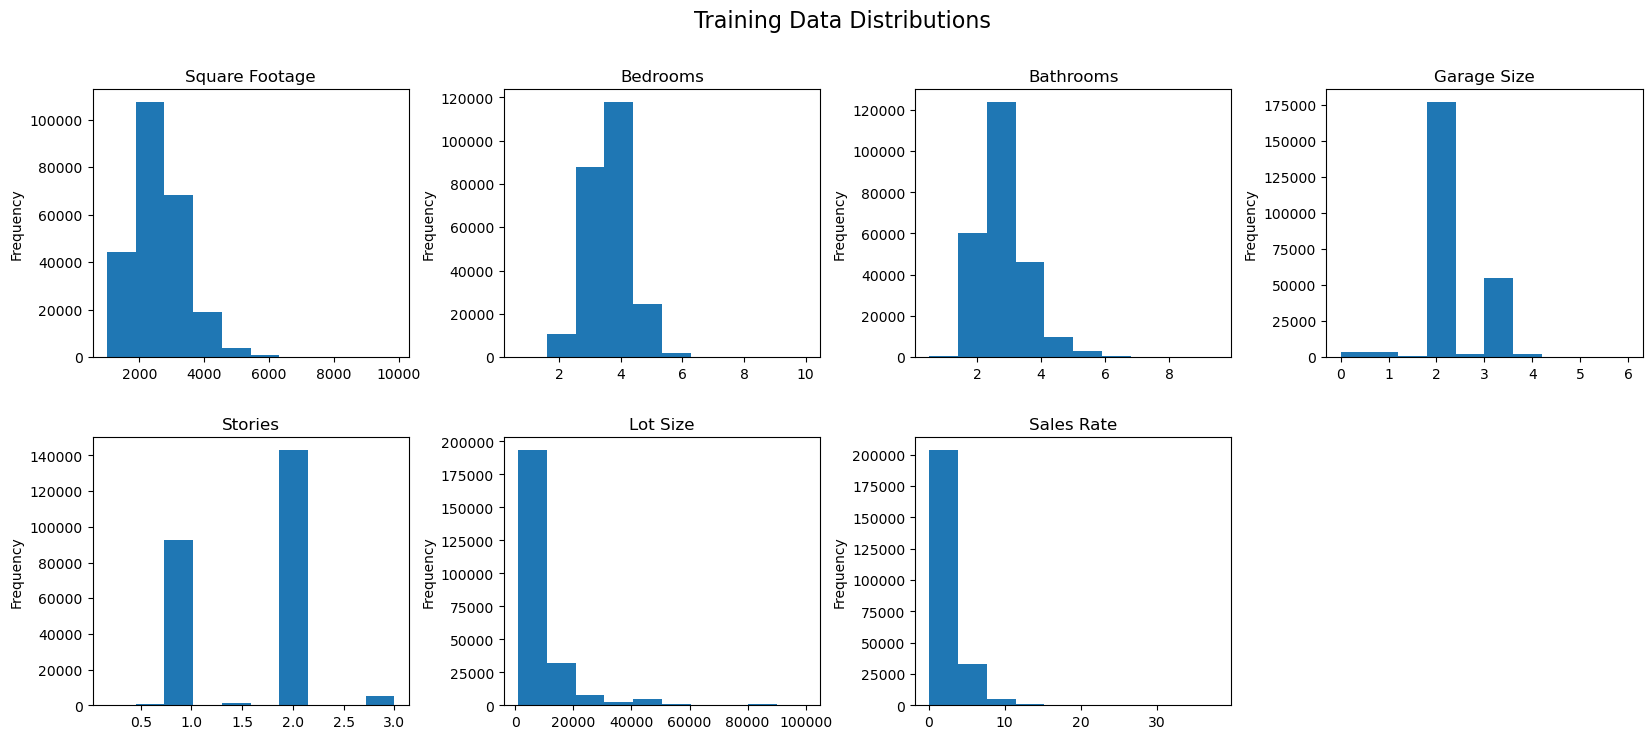

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.remove()
plt.subplot(2, 4, 1)
df["Base Sq Ft"].plot(kind = 'hist')
plt.title('Square Footage')
plt.subplot(2, 4, 2)
df["Bedrooms"].plot(kind = 'hist')
plt.title('Bedrooms')
plt.subplot(2, 4, 3)
df["Baths"].plot(kind = 'hist')
plt.title('Bathrooms')
plt.subplot(2, 4, 4)
df["Garage"].plot(kind = 'hist')
plt.title('Garage Size')
plt.subplot(2, 4, 5)
df["Stories"].plot(kind = 'hist')
plt.title('Stories')
plt.subplot(2, 4, 6)
df["Lot Size"].plot(kind = 'hist')
plt.title('Lot Size')
plt.subplot(2, 4, 7)
df["Sales Rate"].plot(kind = 'hist')
plt.title('Sales Rate')
plt.suptitle("Training Data Distributions", fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

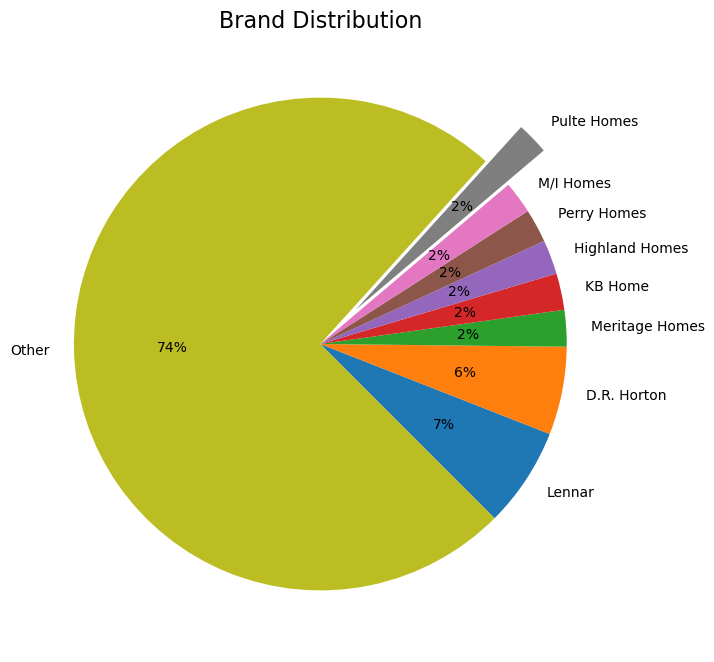

In [7]:
# Show pie chart of top count_to_show brands
count_to_show = 8
brand_counts = df['Brand'].value_counts()
top_brands = brand_counts[:count_to_show].index.tolist()
other_count = brand_counts[count_to_show:].sum()
new_df = pd.DataFrame({
    'Brand': top_brands + ['Other'],
    'Count': brand_counts[:count_to_show].tolist() + [other_count]
})
explodes = [0.2 if brand == 'Pulte Homes' else 0 for brand in new_df['Brand']]
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(new_df['Count'], labels=new_df['Brand'], autopct='%1.0f%%', explode=explodes, shadow=False, startangle = -45)
plt.title('Brand Distribution', fontsize=16)
plt.show()

In [8]:
print('Column descriptions:')
df.describe()

Column descriptions:


,ID,Latitude,Longitude,Base Sq Ft,Bedrooms,Baths,Garage,Stories,Lot Size,Sales Rate,Base Price
count,243069.000000,243069.000000,243069.000000,243069.000000,243069.000000,243069.000000,243069.000000,243069.000000,243069.000000,243069.000000,2.430690e+05
mean,193029.594527,34.569596,-94.333965,2619.279488,3.664281,2.784071,2.204883,1.634282,10027.379309,2.431433,4.581051e+05
std,118368.606466,5.020872,13.352400,781.423360,0.754447,0.733642,0.540624,0.523984,9384.472962,2.110544,2.496029e+05
min,0.000000,25.457310,-123.226134,1000.000000,0.666667,0.500000,0.000000,0.166667,1008.000000,0.100000,7.490000e+04
25%,89766.000000,30.126822,-98.313637,2033.000000,3.000000,2.500000,2.000000,1.000000,6000.000000,1.100000,3.059900e+05
50%,187503.000000,33.391755,-95.538049,2527.000000,4.000000,2.500000,2.000000,2.000000,7312.000000,1.900000,3.999900e+05
75%,290323.000000,38.675951,-82.180217,3077.000000,4.000000,3.000000,2.000000,2.000000,10400.000000,3.100000,5.349950e+05
max,411199.000000,48.289025,-70.578892,9869.000000,10.000000,9.500000,6.000000,3.000000,100000.000000,37.900000,3.000000e+06


In [9]:
print('Correlation between data types:')
df[['Base Sq Ft', 'Bedrooms', 'Baths', 'Garage', 'Stories', 'Base Price', 'Lot Size', 'Sales Rate']].corr(numeric_only=True)

Correlation between data types:


,Base Sq Ft,Bedrooms,Baths,Garage,Stories,Base Price,Lot Size,Sales Rate
Base Sq Ft,1.000000,0.605221,0.738873,0.419603,0.372580,0.514493,0.258239,-0.229968
Bedrooms,0.605221,1.000000,0.592962,0.223934,0.360027,0.222697,0.122792,-0.051617
Baths,0.738873,0.592962,1.000000,0.354488,0.390907,0.491134,0.135106,-0.156431
Garage,0.419603,0.223934,0.354488,1.000000,-0.009327,0.298491,0.112051,-0.118059
Stories,0.372580,0.360027,0.390907,-0.009327,1.000000,0.170109,0.010546,-0.063799
Base Price,0.514493,0.222697,0.491134,0.298491,0.170109,1.000000,0.144225,-0.140515
Lot Size,0.258239,0.122792,0.135106,0.112051,0.010546,0.144225,1.000000,-0.235762
Sales Rate,-0.229968,-0.051617,-0.156431,-0.118059,-0.063799,-0.140515,-0.235762,1.000000
